In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def add_root_to_list(X, root, delta):
    for i in X[::-1]:  # go backwards, makes more sense
        if abs(root - i) < delta:  # if root is "epsilon" close to a different root in list, return
            return None
    # if the root is not in the list:
    X.append(root)

In [3]:
def find_root_bisection_method(a, b, maxerr, func):
    # Check for bracketing:
    if not func(a) * func(b) < 0:
        return    # No bracket in given section -> exit

    # a,b being 2 initial guesses bracketing the root
    z = 0.5 * (a + b)
    delta = 2 * maxerr
    while abs(b - a) >= delta:  # == 2 * max error, saves mul in loop
        if func(z) * func(a) < 0:  # (f(a) negative and f(z) positive,z<b)
            b = z
        else:  # (f(a) and f(z) negative, |z|<|a|)
            a = z
        z = 0.5 * (a + b)
    return z

In [4]:
def find_root_secant_method(a, b, delta, func):
    # x0,x1 being 2 initial guesses near the root, |f(x1)|<|f(x0)|
    x0 = random.uniform(a, b)
    x1 = random.uniform(a, b)
    j = 0
    if abs(func(x1)) < abs(func(x0)):
        z = x1
    else:
        z = x0
    while abs(func(z)) > delta:
        delta_func = (func(x1) - func(x0))
        if abs(delta_func) > delta:  # make sure no devision by 0
            z = x1 - ((func(x1) * (x1 - x0)) / delta_func)
            x0 = x1
            x1 = z
        j += 1
        if z < a or z > b or j == 10:  # algorithm failed after 10 iterations or z out of range - exit
            return   # stopped
    return z

In [5]:
def find_root_newton_raphson(a, b, delta, func):

    def find_der_in_point(f, x):  # think what is the smallest h I can use
        h = 10 ^ -5
        return (f(x + h) - f(x)) / h

    x0 = random.uniform(a, b)  # initial point
    j = 0  # counter of iterations
    while abs(func(x0)) > delta:
        der = find_der_in_point(func, x0)
        if der == 0:
            return
        x0 = x0 - (func(x0) / der)
        j += 1
        if x0 < a or x0 > b or j == 10:  # algorithm failed after 10 iterations or z out of range - exit
            return   # stopped
    return x0

In [6]:
# Lets create a Program that will show us the gain from the number of sections I create on different functions
#Test functions from assignment:
f0 = lambda x: x - 1
f1 = lambda x: 5
f2 = lambda x: x**2 -3*x + 5
f3 = lambda x: math.sin(x**2)
f4 = lambda x: math.e**(-2*x**2)
f5 = lambda x: math.atan(x)
f6 = lambda x: 1/math.log(x) #out for now
f7 = lambda x: math.e**math.e**x
f8 = lambda x: math.log(math.log(x)) #out for now
f9 = lambda x: math.sin(math.log(x)) #out for now
f21 = lambda x: (math.sin(x))/x #out for now
f22 = lambda x: (2**(1/(x**2)))*math.sin(1/x)  #out for now

#Other functions:
f10 = lambda x: 4* math.sin(10*x) - math.cos(x/7)*x + x + 2
f11 = lambda x: x**3
f12 = lambda x: math.sin(x)
f13 = lambda x: 5*(x**3) - 5*(x**2) -5*x -5
f14 = lambda x: 5*(x**2) - 1
f15 = lambda x: x - 1
f16 = lambda x: -2*(x**2) + 2
f17 = lambda x: 2*(x**2) - 2
f18 = lambda x: math.cos(x/309)
f19 = lambda x: x**5 - 34*x**4 +276*x**2 -987
f20 = lambda x: math.sin(x**5) + x**2 - 987
functions = [f0,f1,f2,f3,f4,f5,f7,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20]


In [7]:
#Copy of function for multy functions and iterations test
def intersections(f1, f2, a, b, sections, maxerr=0.001):
    f2 = False #Change if you want 1 function or 2
    def func(f1, f2):
        return lambda x: f1(x) - f2(x)
    X = [] #list of roots found during the run
    if f2 is not False:
      intersect_func = func(f1, f2)
    else:
      intersect_func = f1

    #I'll create a loop scanning the domain [a,b] from side to side
    #every section of the domain will be checked using the root finding methods by hirarchy

    h = abs((b - a) / sections)  # Divide into 200 sections -> is this the "sweetspot"?
    left = a
    right = a + h

    while right <= b:
      # Are the limits of the section are the roots? if so -> finish loop on section
      if abs(intersect_func(left)) < maxerr:
          root = left
          add_root_to_list(X, root, maxerr)
      elif abs(intersect_func(right)) < maxerr:
          root = right
          add_root_to_list(X, root, maxerr)
      else:  # Else -> look for root inside the section
          root = find_root_newton_raphson(left, right, maxerr, intersect_func)
          if root is None:
              root = find_root_secant_method(left, right, maxerr, intersect_func)
              if root is None:
                  root = find_root_bisection_method(left, right, maxerr, intersect_func)
          if root is not None:
              add_root_to_list(X, root, maxerr)
              left = root + h
              right = left + h
              continue

      left = right
      right += h
    return X


In [8]:
number_of_roots = []
j = 0
for func in functions:
  #for sections in range(50,1000,50):
  try:
    roots_num = len(intersections(func, func, -100, 100, 100))
    number_of_roots.append(roots_num)
    j += 1
  except Exception:
    number_of_roots.append(f'Error {j}')

In [9]:
number_of_roots

[1, 0, 0, 49, 99, 1, 'Error 6', 12, 1, 63, 1, 1, 1, 2, 2, 0, 1, 2]

In [10]:
# Lets create a nested list for all the results:
number_of_roots = []
inner = []
for n_of_sections in range(50,1000,50):
  for func in functions:
    inner = [n_of_sections]
    inner.append(len(intersections(func, func, -5, 5, n_of_sections)))
    number_of_roots.append(inner)

In [11]:
# Perpearions for scatter plot
X_values = []
Y_values = []
for point in number_of_roots:
  X_values.append(point[0])
  Y_values.append(point[1])

Text(0.5, 1.0, 'Intersections limit - 80')

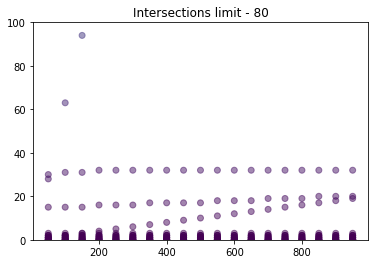

In [12]:
plt.scatter(X_values, Y_values, c=Y_values, alpha=0.5)
plt.ylim(0, 100)
plt.title("Intersections limit - 80")



Text(0.5, 1.0, 'Intersections limit - 50')

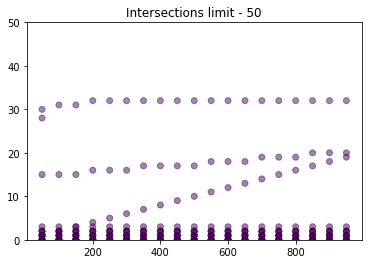

In [13]:
plt.scatter(X_values, Y_values, c=Y_values, alpha=0.5)
plt.ylim(0, 50)
plt.title("Intersections limit - 50")

Text(0.5, 1.0, 'Intersections limit - 30')

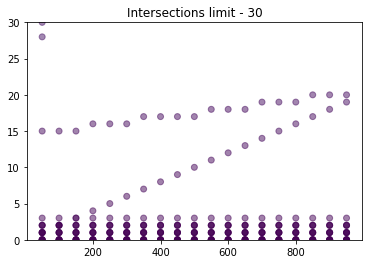

In [14]:
plt.scatter(X_values, Y_values, c=Y_values, alpha=0.5)
plt.ylim(0, 30)
plt.title("Intersections limit - 30")

Text(0.5, 1.0, 'Intersections limit - 10')

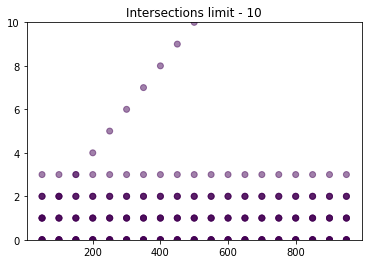

In [15]:
plt.scatter(X_values, Y_values, c=Y_values, alpha=0.5)
plt.ylim(0, 10)
plt.title("Intersections limit - 10")

Final method:

In [16]:
def find_root_bisection_method(a, b, maxerr, func):
    # a,b being 2 initial guesses bracketing the root (different sign)
    delta = 2 * maxerr
    while not abs(b - a) < delta:
        z = (a + b) / 2
        if func(a) * func(z) < 0:
            b = z
        else:
            a = z
    return (a + b) / 2  # (a+b)/2 should be closer to the root than a or b statistically

def check_bracketing(a, b, f):
    if f(a) * f(b) < 0:
        return True
    else:
        return False

def find_root_newton_raphson_bisec(a, b, maxerr, func, max_iter=9):
    x0 = random.uniform(a, b)
    find_der_in_point = lambda f, x, h=0.0001: (f(x + h) - f(x)) / h
    for n in range(0, max_iter):
        try:
            f_x0 = func(x0)
            der_x0 = find_der_in_point(func, x0)
        except ValueError:
            if check_bracketing(a, b, func):
                return find_root_bisection_method(a, b, maxerr, func)
            return None
        if abs(f_x0) < maxerr:
            return x0
        if der_x0 == 0:
            if check_bracketing(a, b, func):
                return find_root_bisection_method(a, b, maxerr, func)
            return None
        x0 = x0 - f_x0 / der_x0
    if check_bracketing(a, b, func):
        return find_root_bisection_method(a, b, maxerr, func)
    return None


def Intersections(f1: callable, f2: callable, a: float, b: float, maxerr=0.001):
    X = []  # list of roots found during the run
    intersect_func = lambda x: 100000 * (f1(x) - f2(x))
    # creates the intersect function out of f1 and f2 - both parameters in main function
    # I'll create a loop scanning the domain [a,b] from side to side
    # every section of the domain will be checked using the root finding methods by hierarchy
    h = 1/50  # Create section small enough
    left = a
    right = a + h

    while right <= b:
        # Are the limits of the section the roots? if so -> finish loop on section
        if abs(intersect_func(left)) < maxerr:
            X.append(left)

        elif abs(intersect_func(right)) < maxerr:
            X.append(right)

        # Check for bracketing, Else, leave section
        else:
            root = find_root_newton_raphson_bisec(left, right, maxerr, intersect_func)
            if root is not None and left <= root <= right:
                X.append(root)
                # If found root -> take a smaller step forward
                left = root + h
                right = left + h
                continue
        left = right
        right += h

    return X

Final Method for EX3 (no try-except for speed)

In [23]:
def find_root_bisection_method(a, b, maxerr, func):
    # a,b being 2 initial guesses bracketing the root (different sign)
    delta = 2 * maxerr
    while not abs(b - a) < delta:
        z = (a + b) / 2
        if func(a) * func(z) < 0:
            b = z
        else:
            a = z
    return (a + b) / 2  # (a+b)/2 should be closer to the root than a or b statistically

def check_bracketing(a, b, f):
    if f(a) * f(b) < 0:
        return True
    else:
        return False

def find_root_newton_raphson_bisec(a, b, maxerr, func,max_iter = 9):
    '''
    This function implements the Newton Raphson algorithm
    and in failed case moves directly to bisection method
    return: A single root of func in the given range [a,b]
    '''
    # x0 = random.uniform(a, b)
    x0 = (a + b)/2  # initial point as random -> middle of section

    der = lambda f, x, h = 1e-8: ((f(x + h) - f(x)) / h)

    for i in range(max_iter):  # Forloop to prevent recalculation every iteration
        f_x0 = func(x0)
        der_x0 = der(func, x0)
        if der_x0 == 0:  # Zero derivative, No solution found
            if check_bracketing(a, b, func):
                return find_root_bisection_method(a, b, maxerr, func)  # Failed? try bisection
            return None
        x0 = x0 - f_x0 / der_x0
        if (x0 < a) or (x0 > b):  # X is out of range and might cause Valuerror, exit function
            break

        if abs(f_x0) < maxerr:  # Found solution.
            return x0
    # Exceeded maximum iterations, No solution found. Try bisection.
    if check_bracketing(a, b, func):
        return find_root_bisection_method(a, b, maxerr, func)  # Failed? try bisection
    return None


def intersectionsEX3(f1: callable, f2: callable, a: float, b: float, maxerr=0.001):
    """
    Find as many intersection points as you can. The assignment will be
    tested on functions that have at least two intersection points, one
    with a positive x and one with a negative x.

    This function may not work correctly if there is infinite number of
    intersection points. 

    Approach: In order to improve running times and since I wish to find all the roots,
    I'll only visit a section if there is a root in it (via intermediate theorem)

    Parameters
    ----------
    f1 : callable
        the first given function
    f2 : callable
        the second given function
    a : float
        beginning of the interpolation range.
    b : float
        end of the interpolation range.
    maxerr : float
        An upper bound on the difference between the
        function values at the approximate intersection points.


    Returns
    -------
    X : iterable of approximate intersection Xs such that for each x in X:
        |f1(x)-f2(x)|<=maxerr.

    """

    X = []  # list of roots found during the run
    intersect_func = lambda x: 100000 * (f1(x) - f2(x))
    # creates the intersect function out of f1 and f2 - both parameters in main function

    # I'll create a loop scanning the domain [a,b] from side to side
    # every section of the domain will be checked using the root finding methods by hierarchy
    h = 1/50  # Create section small enough
    left = a
    right = a + h

    while right <= b:
        # Are the limits of the section the roots? if so -> finish loop on section
        if abs(intersect_func(left)) < maxerr:
            X.append(left)

        elif abs(intersect_func(right)) < maxerr:
            X.append(right)

        # Check for bracketing, Else, leave section
        else:
            root = find_root_newton_raphson_bisec(left, right, maxerr, intersect_func)
            if root is not None:
                X.append(root)
                # If found root -> take a smaller step forward
                left = root + h
                right = left + h
                continue
        left = right
        right += h

    return X

In [20]:
functions = [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22]  #full list

In [30]:
number_of_roots = []
j = 0
for func in functions:
  #for sections in range(50,1000,50):
  try:
    roots_num = len(intersectionsEX3(func, lambda x:0, 1, 100))  # the relevant range for this assignment
    number_of_roots.append(roots_num)
    j += 1
  except Exception as e:
    print(f'function {j} had an error: {e}')
    number_of_roots.append(f'Error {j}')
    j += 1

function 6 had an error: float division by zero
function 7 had an error: (34, 'Numerical result out of range')
function 8 had an error: math domain error


In [31]:
print(number_of_roots)

[1, 0, 0, 2538, 4849, 0, 'Error 6', 'Error 7', 'Error 8', 2, 39, 0, 31, 1, 0, 1, 1, 1, 0, 1, 1, 31, 0]


In [34]:
#f8(1)  # of course, it's not in range for this function
#f6(1)  # again, 1/ ln(x=1)  creates zero devision error